# Most frequent words from Negative labeled Tweets

In [2]:
#Get most frequent Words from Negative and Positive Tweets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import re
import contractions
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as im
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None  # default='warn'

file_name = '2900_per_day_sentiment'
#Import CSV and create DataFrame
df = pd.read_csv(file_name + '.csv')

#Get only text and sentiment columns by dropping all the others
df = df.drop(columns=['index', 'Unnamed: 0', 'Unnamed: 0.1', 'textblob_sent_scores', 'vader_sent_comp', 'TextBlob_sent'])

#Rename both columns
df.columns = ['text', 'sentiment']

#Create a DF with only positive sentiment tweets
df_pos = df[df['sentiment'] == 'pos']
df_neg = df[df['sentiment'] == 'neg']

#Clean Text
def clean(text):
    text = text.lower()                                          #Lowercase Tweets
    text = re.sub(r'&amp', '', text)                             #Remove '&amp' 
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)      #Delete URLs
    text = re.sub('@[^\s]+','',text)                             #Remove @Users
    text = re.sub('#[^\s]+','',text)                             #Remove Hashtags
    text = re.sub(r'[^a-zA-z\'\s\_\_]', '', text)                #Remove special characters such as #, -, " (? and ! in)
    text = text.replace(r"\n", " ")                              #Delete "\n"
    text = re.sub(r'\s+',' ', text)                              #Replace two or more spaces with only one
    return text

#Apply clean function
df_neg['text_cleaned'] = df_neg['text'].apply(clean)

#Expand contractions (output is a tokenized list)
df_neg['text_no_contractions'] = df_neg['text_cleaned'].apply(lambda x: [contractions.fix(word) for word in x.split()])

#Convert tokenized column into strings
df_neg['text_str'] = [' '.join(map(str, each)) for each in df_neg['text_no_contractions']]

#Tokenize again
df_neg['tokenized_text'] = df_neg['text_str'].apply(word_tokenize)

#Remove stop words
stop_words = stopwords.words('english')
df_neg['tokenized_text_no_stopwords'] = df_neg['tokenized_text'].apply(lambda x: 
                                                                    [word for word in x 
                                                                     if word not in stop_words])

#Convert to String again
df_neg['text_str2'] = [' '.join(map(str, each)) for each in df_neg['tokenized_text_no_stopwords']]
#Drop unnecesary columns
df_neg = df_neg.drop(columns=['text', 'text_cleaned', 'text_no_contractions', 'text_str', 
                              'tokenized_text', 'tokenized_text_no_stopwords']).reset_index()

tweets_neg = df_neg['text_str2']
tweets_neg_arr = tweets_neg.to_numpy()
counter_neg = CountVectorizer()
tweets_neg2 = counter_neg.fit_transform(tweets_neg_arr)
tweets_df_neg = pd.DataFrame(tweets_neg2.toarray(), columns=counter_neg.get_feature_names())

top_words_neg = tweets_df_neg.sum().sort_values(ascending=False).iloc[1:500]
words_dict = top_words_neg.to_dict()

top_words_neg = top_words_neg.to_frame()
top_words_neg = top_words_neg.reset_index().rename(columns={'index': 'Word', 0:'Frequency'})

print(top_words_neg.head())

        Word  Frequency
0      covid      12258
1     people       3684
2  americans       3580
3         us       3450
4       dead       2309


### Create Wordcloud with most frequent words in negative labeled tweets

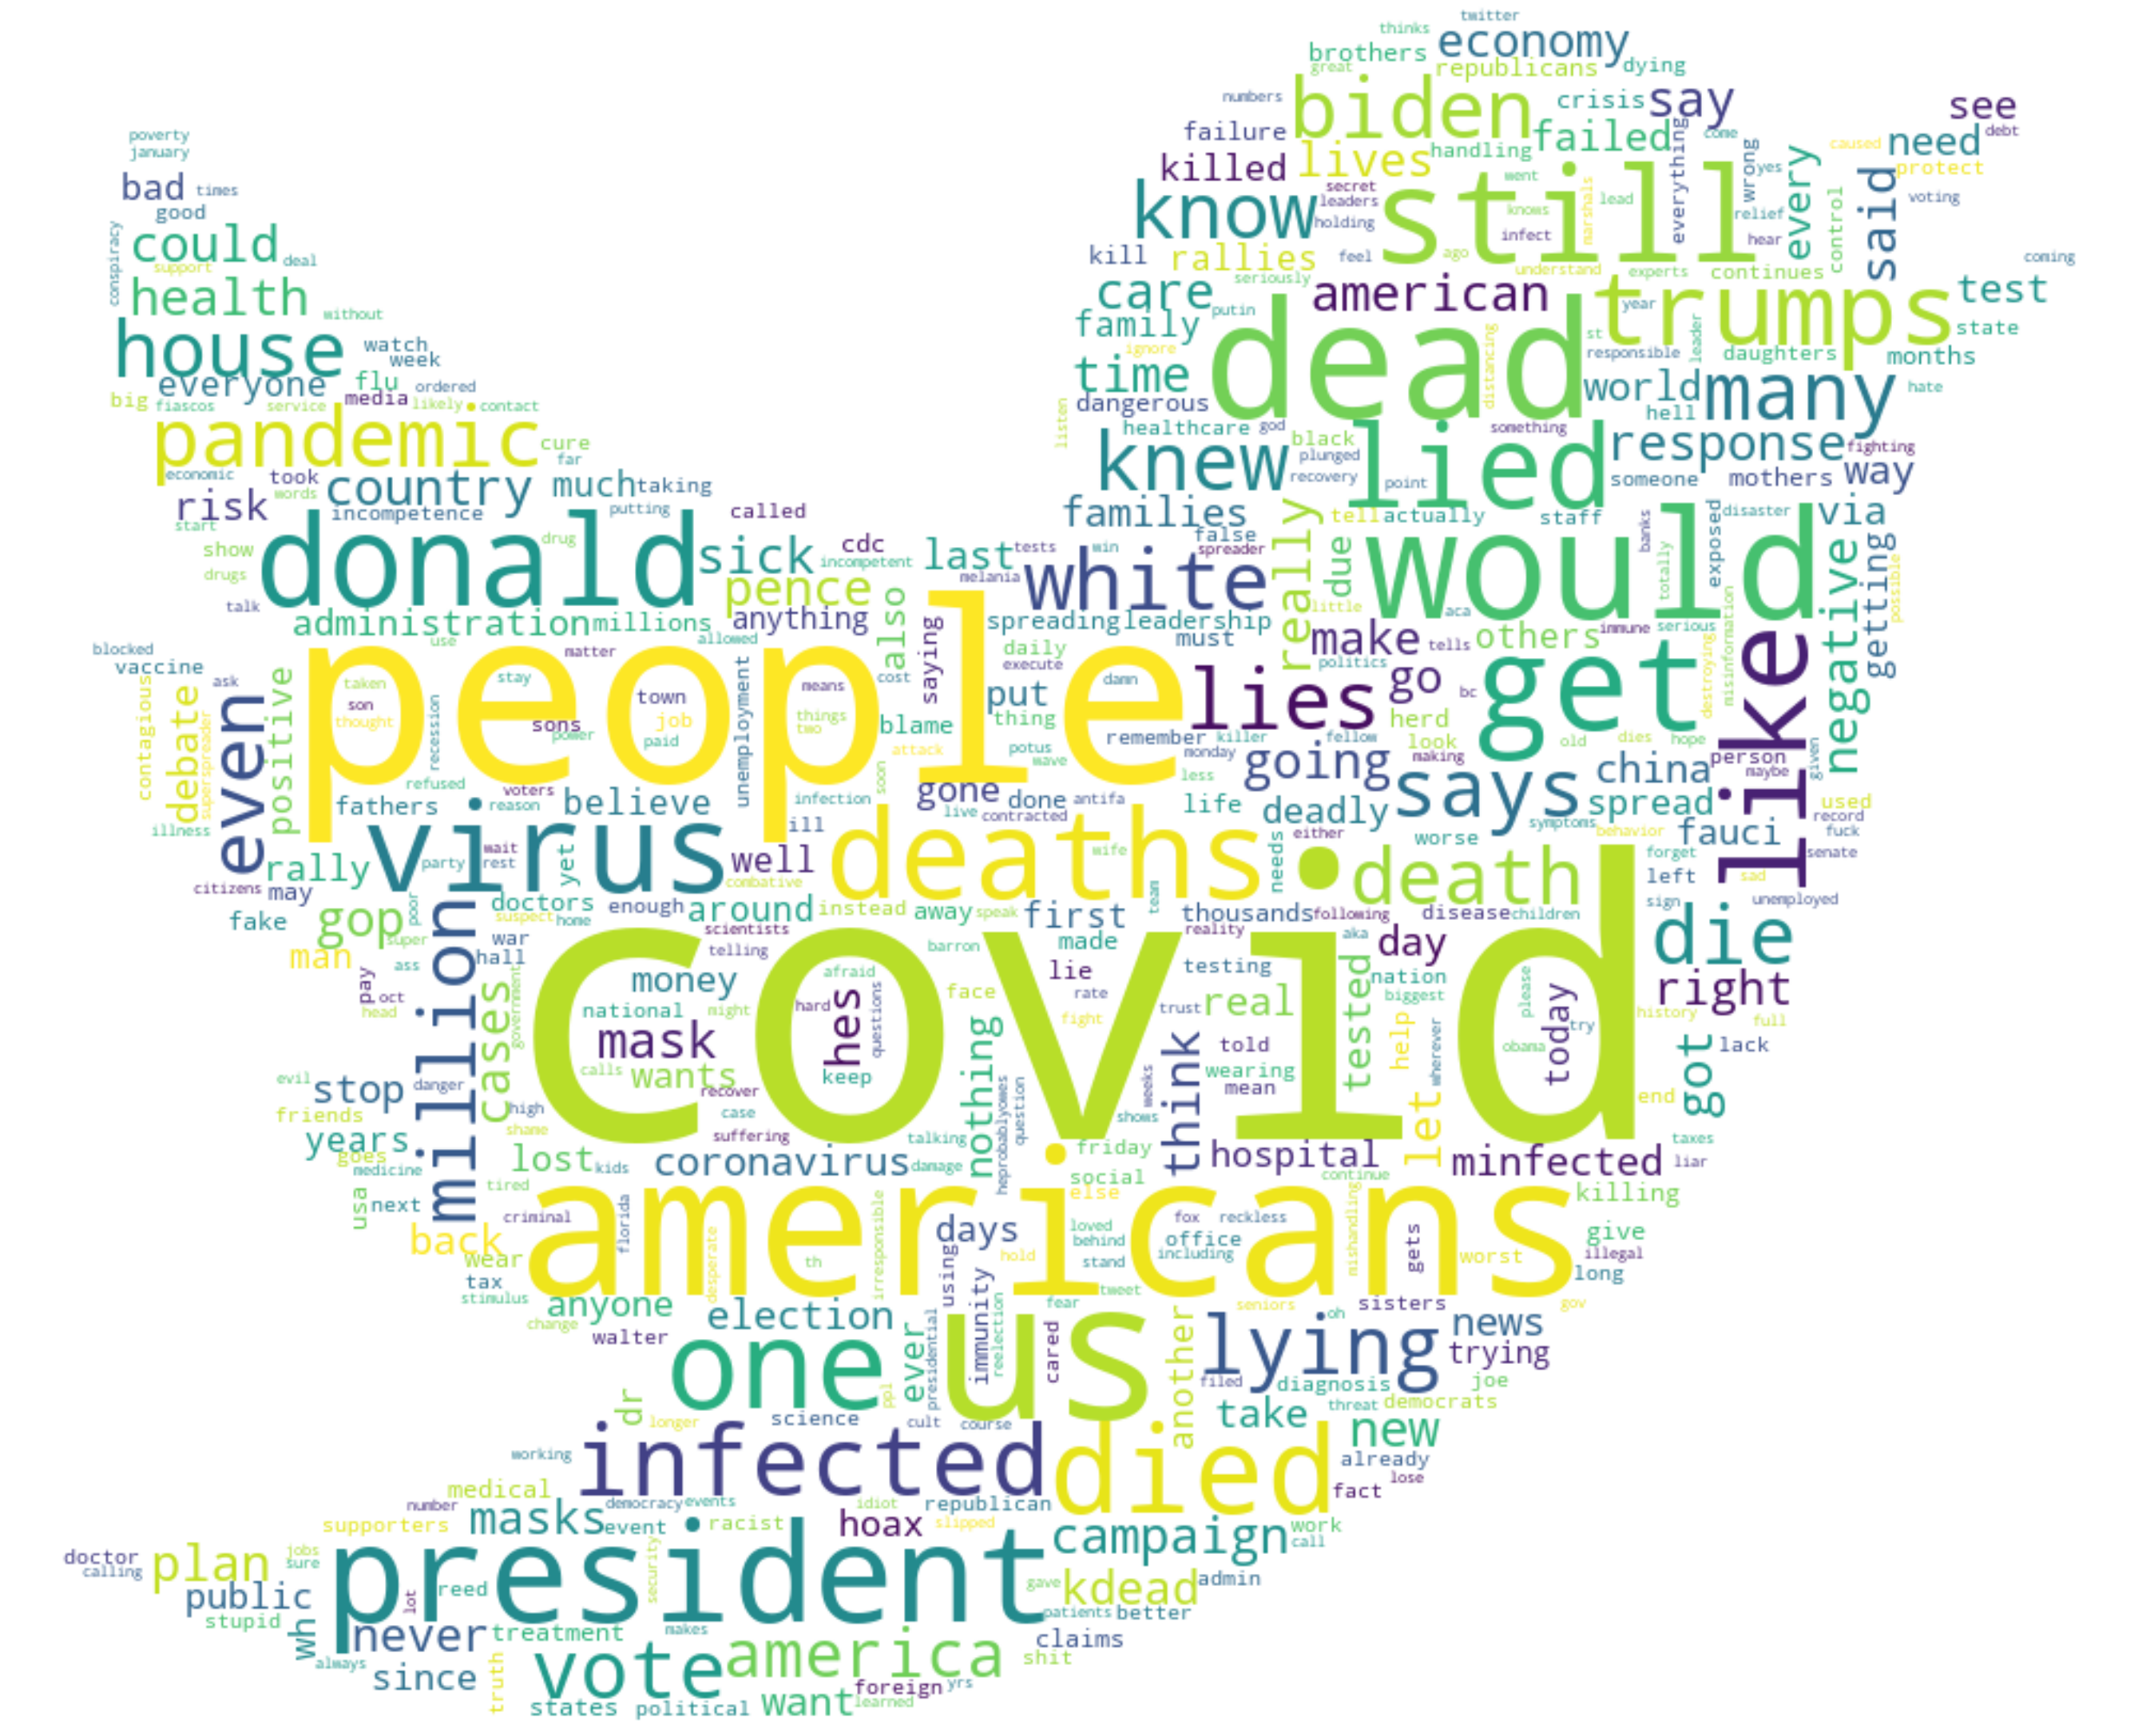

In [7]:
mask = np.array(Image.open('twitter_mask.png'))

from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    mask = mask,
    background_color = 'white', 
    max_words=None).generate_from_frequencies(words_dict)
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.close()

### Histogram of first 30 most frequent words in negative labeled tweets

         Word  Frequency
0       covid      12258
1      people       3684
2   americans       3580
3          us       3450
4        dead       2309
5       would       2029
6   president       1909
7       still       1813
8         get       1747
9      donald       1631
10     deaths       1602
11      virus       1584
12        one       1580
13       died       1496
14       lied       1414
15       like       1392
16     trumps       1345
17   infected       1301
18   pandemic       1297
19      biden       1264
20       lies       1253
21      white       1249
22       vote       1205
23       says       1185
24      lying       1172
25        die       1169
26       many       1153
27       knew       1132
28    million       1095
29      house       1087


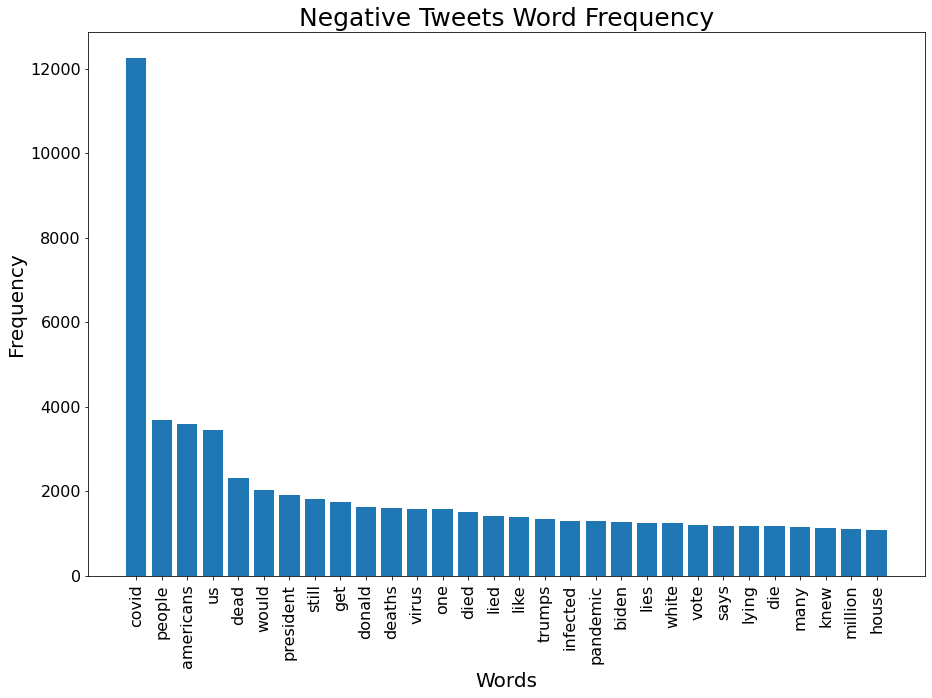

In [8]:
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
top_words_neg = top_words_neg.iloc[0:30]
print(top_words_neg)
fig, ax = plt.subplots(figsize=[15,10])
plt.bar(top_words_neg['Word'], top_words_neg['Frequency'])
plt.title("Negative Tweets Word Frequency", fontsize=25)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Words", fontsize=20)
plt.xticks(rotation=90)
ax.tick_params(axis='x', which='major', pad=5)
plt.show()